In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.datasets

### Beispiel 4.1 PCA in Python
Für einen gegebenen Datensatz führen wir eine Hauptkomponentenanalyse (PCA) mit Hilfe der Funktion $\texttt{PCA}$ aus dem Paket $\texttt{sklearn.decomposition}$ durch.

#### 1 Importieren des Datensatzes

In [2]:
# ein aus Python zugänglicher R Datensatz
USArrests = pd.DataFrame(statsmodels.datasets.get_rdataset("USArrests").data)

In [3]:
# Anzeigen der Struktur und ersten Zeilen des Datensatzes
USArrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


#### 2 Visualisieren des Datensatzes

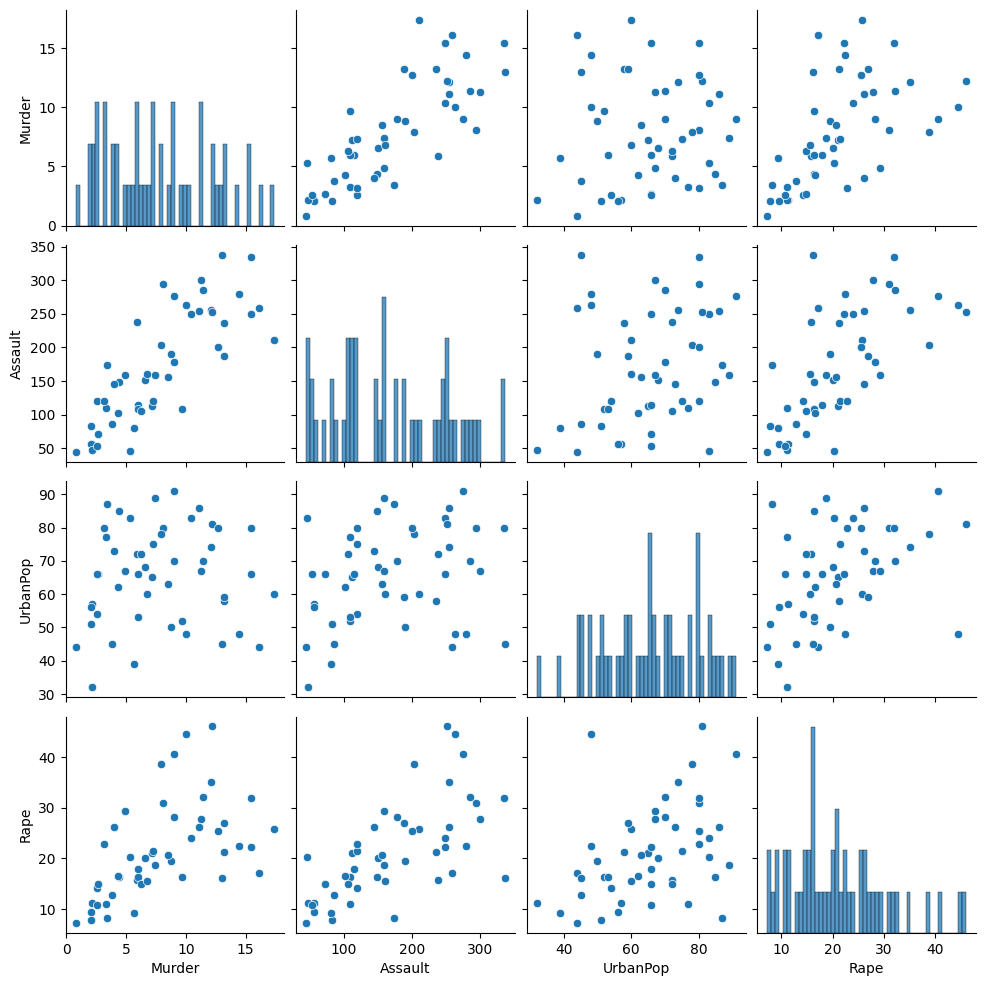

In [5]:
# Visualisierung
sns.pairplot(USArrests, diag_kind="hist", diag_kws={"bins": 50})
plt.axis("auto")
plt.show()

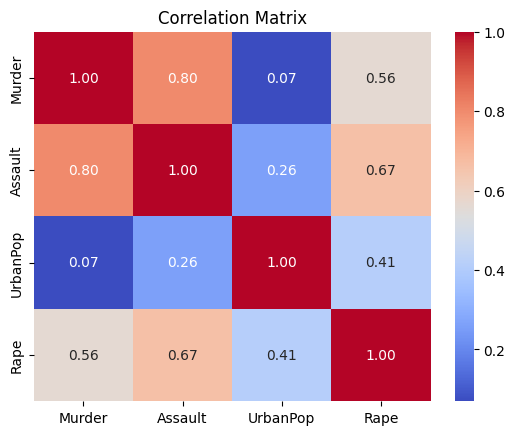

In [6]:
# Korrelationsmatrix
correlation_matrix = USArrests.corr()
# Plot der Korrelationsmatrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### 3 Standardisierung der Variablen
Wir führen die Hauptkomponentenanalyse auf den standardisierten Variablen durch, da so die Richtung der größten Varianz nicht durch möglicherweise unterschiedliche absolute Werteskalen der einzelnen Variablen verzerrt wird.

In [7]:
# Calculate mean, variance, and standard deviation for all variables
means = USArrests.mean()
variances = USArrests.var()
std_devs = USArrests.std()

print("Means:\n", means)
print("Variances:\n", variances)
print("Standard Deviations:\n", std_devs)

Means:
 Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
Variances:
 Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64
Standard Deviations:
 Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64


In [8]:
# Perform PCA with scaled variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(USArrests)

In [9]:
# Calculate mean, variance, and standard deviation for all variables
print("Means:\n", scaled_data.mean())
print("Variances:\n", scaled_data.var())
print("Standard Deviations:\n", scaled_data.std())

Means:
 1.021405182655144e-16
Variances:
 1.0
Standard Deviations:
 1.0


#### 4 Hauptkomponentenanalyse

In [10]:
# PCA Analyse auf den standardisierten Daten
pca = PCA()
pca_usa = pca.fit(scaled_data)

In [11]:
# Output: 4 Hauptkomponenten. Sie bilden eine Orthonormalbasis im R^4 (-> wir haben vier metrische(!) Variablen was R^4 entspricht)
print("Principal Components:\n", pca.components_)

Principal Components:
 [[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [-0.41818087 -0.1879856   0.87280619  0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [-0.6492278   0.74340748 -0.13387773 -0.08902432]]


In [12]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [13]:
# erste Hauptkomponente
pca.components_[0]

array([0.53589947, 0.58318363, 0.27819087, 0.54343209])

In [14]:
# zweite Hauptkomponenten
pca.components_[1]

array([-0.41818087, -0.1879856 ,  0.87280619,  0.16731864])

In [15]:
# wir betrachten den ersten Datenpunkt in unserem Datensatz (Alabama)
scaled_data[0]

array([ 1.25517927,  0.79078716, -0.52619514, -0.00345116])

In [16]:
# wir machen einen Basiswechsel zu den 4 Hauptkomponenten und schreiben den Datenpunkt "Alabama" mit den Koordinaten bzgl. der neuen Basis
pca_usa.transform(scaled_data)[0]

array([ 0.98556588, -1.13339238, -0.44426879, -0.15626714])

In [17]:
USArrests.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='rownames')

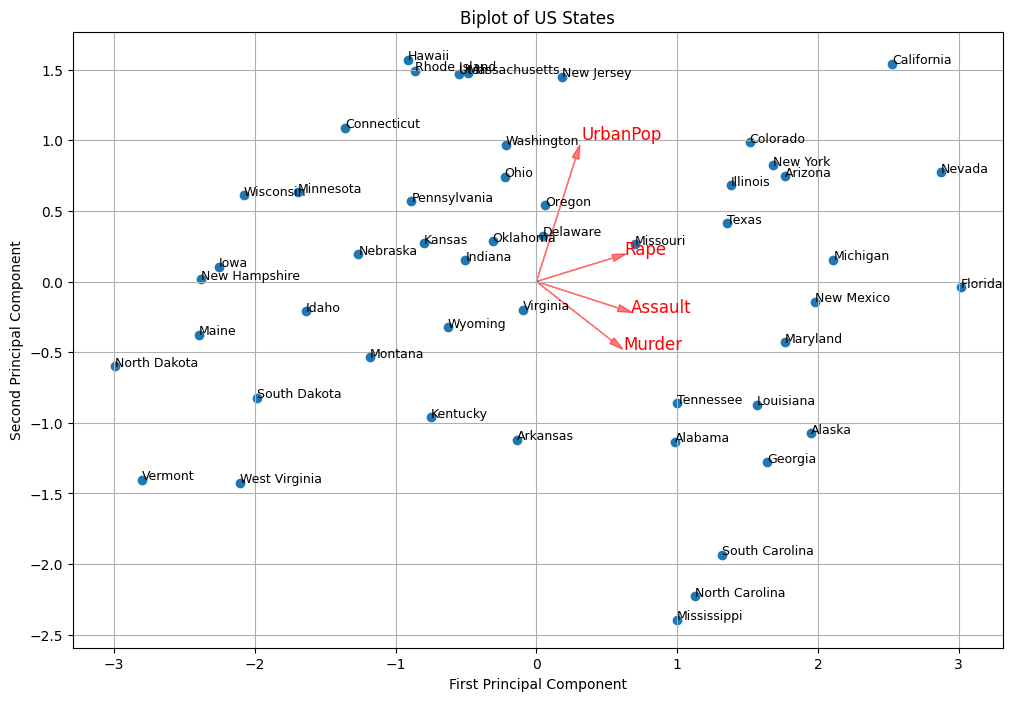

In [18]:
# Visualize states based on PC1 and PC2
plt.figure(figsize=(12, 8))
pc1 = pca_usa.transform(scaled_data)[:, 0]
pc2 = pca_usa.transform(scaled_data)[:, 1]
plt.scatter(pc1, pc2)

# add labels for each state
for i, state in enumerate(USArrests.index):
    plt.text(pc1[i], pc2[i], state, fontsize=9)

# add arrows to illustrate contributions of original variables to the principal components
for i, var in enumerate(USArrests.columns):
    plt.arrow(
        0,
        0,
        pca.components_[0, i],
        pca.components_[1, i],
        color="r",
        alpha=0.5,
        head_width=0.05,
        head_length=0.1,
    )
    plt.text(
        pca.components_[0, i] * 1.15,
        pca.components_[1, i] * 1.15,
        var,
        color="r",
        fontsize=12,
    )

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Biplot of US States")
plt.grid(True)
plt.show()

#### 5 Anteil der erklärten Varianz (Proportion of Variance Explained (PVE))
Die PVE einer Hauptkomponente gibt an, welcher Anteil der gesamten Varianz im Datensatz durch die betrachtete Hauptkomponente erklärt wird. Sie ist ein Hilfsmittel zur Wahl der Anzahl an Hauptkomponenten.

In [19]:
# Variance of each principal component
pca_usa_var = pca.explained_variance_
print("Variance of each principal component:\n", pca_usa_var)

Variance of each principal component:
 [2.53085875 1.00996444 0.36383998 0.17696948]


In [20]:
# Proportion of variance explained by each principal component
pca_usa_pve = pca.explained_variance_ratio_
print("Proportion of variance explained:\n", pca_usa_pve)

Proportion of variance explained:
 [0.62006039 0.24744129 0.0891408  0.04335752]


In [21]:
# Cumulative proportion of variance explained
cumulative_pve = np.cumsum(pca_usa_pve)
print("Cumulative proportion of variance explained:\n", cumulative_pve)

Cumulative proportion of variance explained:
 [0.62006039 0.86750168 0.95664248 1.        ]


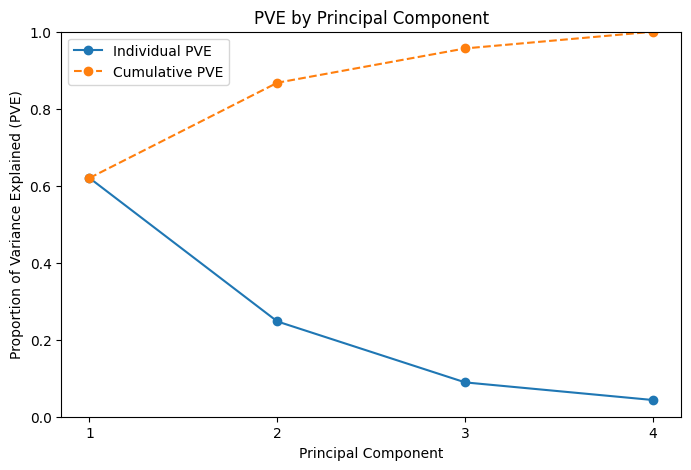

In [22]:
# Plot proportion of variance explained and cumulative variance explained
plt.figure(figsize=(8, 5))
components = np.arange(1, len(pca_usa_pve) + 1)

plt.plot(components, pca_usa_pve, marker="o", linestyle="-", label="Individual PVE")
plt.plot(components, cumulative_pve, marker="o", linestyle="--", label="Cumulative PVE")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained (PVE)")
plt.ylim(0, 1)
plt.title("PVE by Principal Component")
plt.xticks(components)
plt.legend()
plt.show()